# Statistical Learning Project

#### (Naveen Pete, PGP-AIML Online August 20-A)

## Data Description

The data at hand contains medical costs of people characterized by certain attributes.

## Domain
Healthcare

## Context
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

## Attribute Information
- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance.

## Learning Outcomes
- Exploratory Data Analysis
- Practicing statistics using Python
- Hypothesis testing

## Objective
We want to see if we can dive deep into this data to find some valuable insights.

### 1. Import the necessary libraries (2 marks)

In [1]:
# Libraries needed for scientific computation, data analysis and manipulation
import numpy as np
import pandas as pd

# Libraries needed for statistical data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Libraries needed for statistical computations, analysis and hypothesis testing
import scipy.stats as stats
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import proportions_ztest, proportions_chisquare
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sns.set(color_codes=True)
%matplotlib inline

### 2. Read the data as a data frame (2 marks)

In [2]:
# Initialize dataframe with insurance dataset. Initialize individual columns with corresponding data values
insurance_df = pd.read_csv("insurance.csv")

age_col = insurance_df['age']
sex_col = insurance_df['sex']
bmi_col = insurance_df['bmi']
children_col = insurance_df['children']
smoker_col = insurance_df['smoker']
region_col = insurance_df['region']
charges_col = insurance_df['charges']

In [3]:
insurance_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 3. Exploratory Data Analysis (EDA) (28 marks)

### 3. (a) Shape of the data (2 marks)

In [4]:
row_count, column_count = insurance_df.shape

print(f'No. of rows: {row_count}')
print(f'No. of columns: {column_count}')

No. of rows: 1338
No. of columns: 7


In [5]:
len(insurance_df.index)

1338

In [6]:
len(insurance_df.columns)

7

**Observations**
- There are 1338 rows and 7 columns in the dataset

### 3. (b) Data type of each attribute (2 marks)

#### Solution A: pandas.DataFrame.info()

In [7]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Solution B: pandas.DataFrame.dtypes

In [8]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Observations**
- There are 4 numerical variables: age, bmi, children, charges
- There are 3 categorical variables: sex, smoker, region

### 3. (c) Checking the presence of missing values (3 marks)

#### Solution A: pandas.DataFrame.isna()

In [9]:
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


#### Solution B: pandas.DataFrame.isnull()

In [10]:
insurance_df.isnull().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [11]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observations**
- There are no missing / null values in the dataset. All rows and colums contain data

### 3. (d) 5 point summary of numerical attributes (3 marks)

#### Solution A: pandas.DataFrame.describe()

In [12]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### Solution B: numpy.percentile()

In [13]:
# Custom function to display 5-point summary of a column data
# Column name to be passed as a parameter

def show_5point_summary(col_name):
    col_data = insurance_df[col_name]
    
    min_value = col_data.min()
    max_value = col_data.max()
    quartiles = np.percentile(col_data, [25, 50, 75])
    
    print(f"5-point summary for '{col_name}' column")
    print('  Min:', min_value)
    print('    Q1 (25%):', quartiles[0])
    print('    Median (50%):', quartiles[1])
    print('    Q3 (75%):', quartiles[2])
    print('  Max:', max_value)

In [14]:
show_5point_summary('age')

5-point summary for 'age' column
  Min: 18
    Q1 (25%): 27.0
    Median (50%): 39.0
    Q3 (75%): 51.0
  Max: 64


In [15]:
show_5point_summary('bmi')

5-point summary for 'bmi' column
  Min: 15.96
    Q1 (25%): 26.29625
    Median (50%): 30.4
    Q3 (75%): 34.69375
  Max: 53.13


In [16]:
show_5point_summary('children')

5-point summary for 'children' column
  Min: 0
    Q1 (25%): 0.0
    Median (50%): 1.0
    Q3 (75%): 2.0
  Max: 5


In [17]:
show_5point_summary('charges')

5-point summary for 'charges' column
  Min: 1121.8739
    Q1 (25%): 4740.28715
    Median (50%): 9382.033
    Q3 (75%): 16639.912515
  Max: 63770.42801


### 3. (e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns. (4 marks)

#### Solution A: seaborn.distplot()

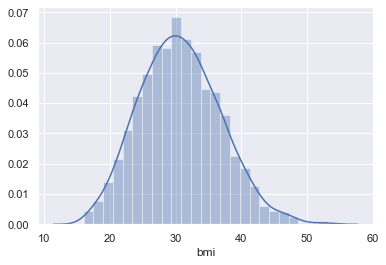

In [18]:
sns.distplot(bmi_col, bins=25)

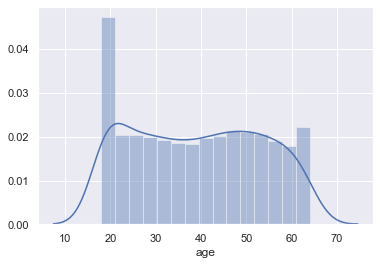

In [19]:
sns.distplot(age_col, bins=15)

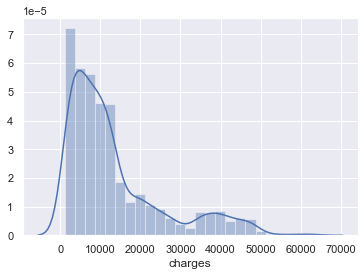

In [20]:
sns.distplot(charges_col, bins=25)

#### Solution B: matplotlib.pyplot.hist()

In [21]:
# Custom function to plot a histogram using matplotlib.pyplot library
def plot_histogram(col_name, bins, title, x_label):
    plt.hist(insurance_df[col_name], bins=bins)
    plt.title(title)
    plt.xlabel(x_label)

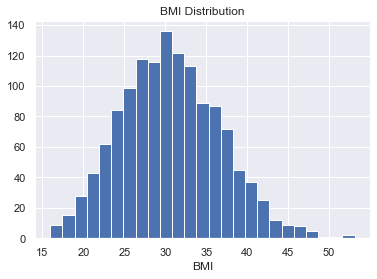

In [22]:
plot_histogram('bmi', 25, 'BMI Distribution', 'BMI')

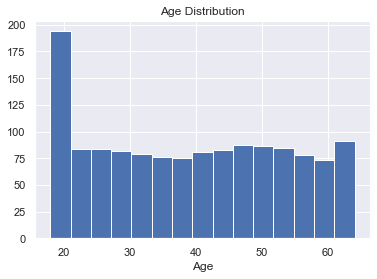

In [23]:
plot_histogram('age', 15, 'Age Distribution', 'Age')

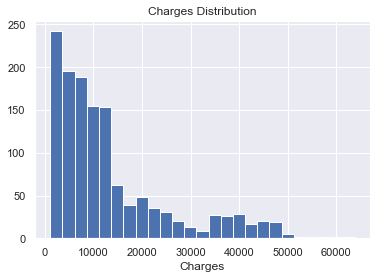

In [24]:
plot_histogram('charges', 25, 'Charges Distribution', 'Charges')

**Observations**
- BMI distribution is nearly normal and symmetrical. It is slightly skewed towards right side
- Age distribution is more or less uniform
- Charges distribution is right-skewed

### 3. (f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns (2 marks)

#### Solution A: pandas.DataFrame.skew()

In [25]:
insurance_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [26]:
bmi_col.skew()

0.2840471105987448

In [27]:
age_col.skew()

0.05567251565299186

In [28]:
charges_col.skew()

1.5158796580240388

#### Solution B: scipy.stats.skew()

In [29]:
stats.skew(bmi_col, bias=False)

0.28404711059874477

In [30]:
stats.skew(age_col, bias=False)

0.055672515652991854

In [31]:
stats.skew(charges_col, bias=False)

1.5158796580240383

### 3. (g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns (4 marks)

In [32]:
# Custom function to display boxplot for BMI/Age/Charges (passed as input parameter)
# Each boxplot shows the distribution with outliers for Gender, Smoker and Region categories 
def plot_distribution(y_col, palette):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 10))
    sns.boxplot(x='sex', y=y_col, data=insurance_df, palette=palette, ax=axes[0, 0])
    sns.boxplot(x='smoker', y=y_col, data=insurance_df, palette=palette, ax=axes[0, 1])
    sns.boxplot(x='region', y=y_col, data=insurance_df, palette=palette, ax=axes[1, 0])
    plt.tight_layout()

#### BMI

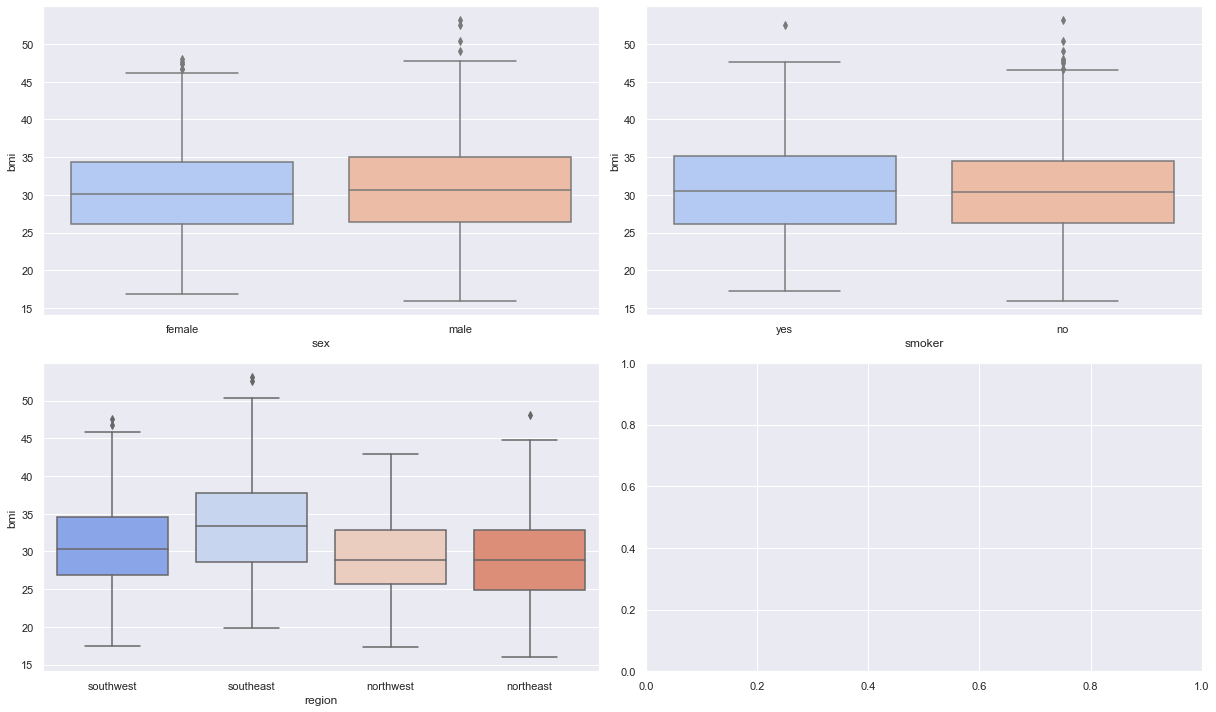

In [33]:
plot_distribution('bmi', 'coolwarm')

**Observations**
- BMI data has outliers in all categories except one
- No outliers observed only in NorthWest region

#### Age

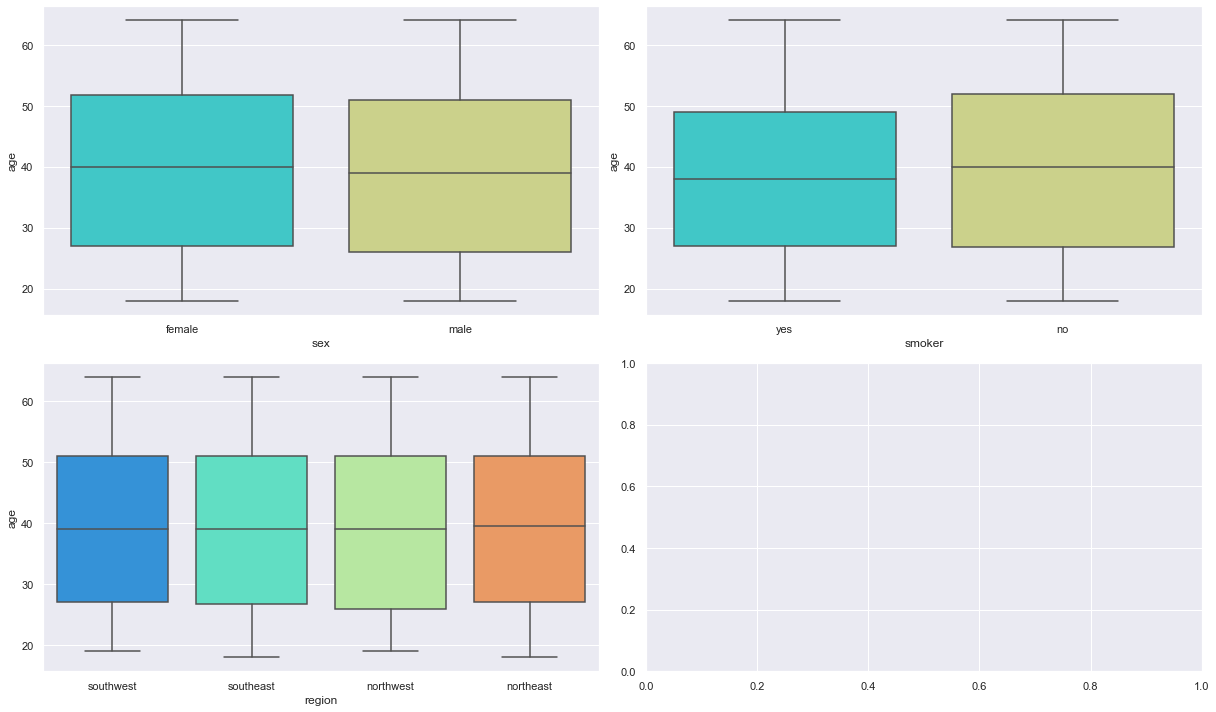

In [34]:
plot_distribution('age', 'rainbow')

**Observations**
- Age data has no outliers

#### Charges

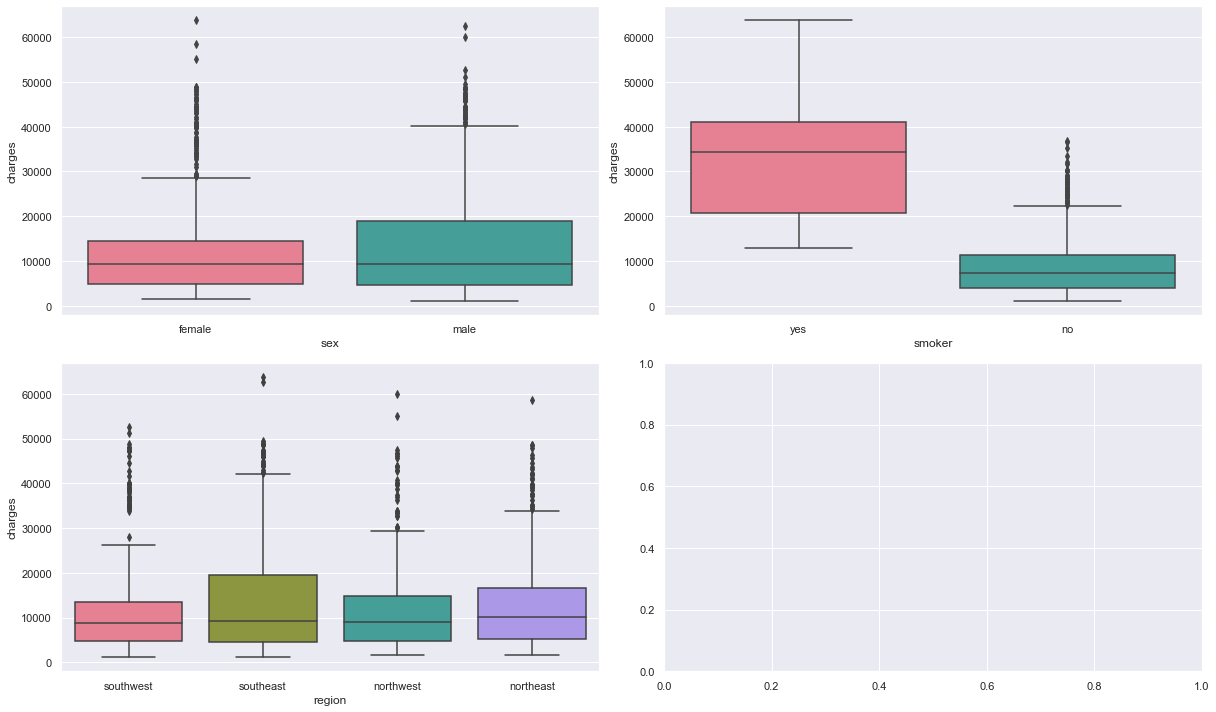

In [35]:
plot_distribution('charges', 'husl')

**Observations**
- Charges data has outliers in all categories except one
- No outliers observed only for Smokers category

### 3. (h) Distribution of categorical columns (include children) (4 marks)

#### Solution A: Plot distribution individually with Region (main group) and Gender/Smoker (sub groups)

In [36]:
# Custom function to display various categorical plots with nested grouping
def plot_distribution_with_nested_grouping(y_col):
    x_col = 'region'
    hues = ('sex', 'smoker')
    
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17, 15))
    
    sns.violinplot(x=x_col, y=y_col, hue=hues[0], data=insurance_df, palette='rainbow', ax=axes[0, 0], split=True)
    sns.violinplot(x=x_col, y=y_col, hue=hues[1], data=insurance_df, palette='coolwarm', ax=axes[0, 1], split=True)

    sns.barplot(x=x_col, y=y_col, hue=hues[0], data=insurance_df, palette='rainbow', ax=axes[1, 0])
    sns.barplot(x=x_col, y=y_col, hue=hues[1], data=insurance_df, palette='coolwarm', ax=axes[1, 1])
    
    sns.boxplot(x=x_col, y=y_col, hue=hues[0], data=insurance_df, palette='rainbow', ax=axes[2, 0])
    sns.boxplot(x=x_col, y=y_col, hue=hues[1], data=insurance_df, palette='coolwarm', ax=axes[2, 1])

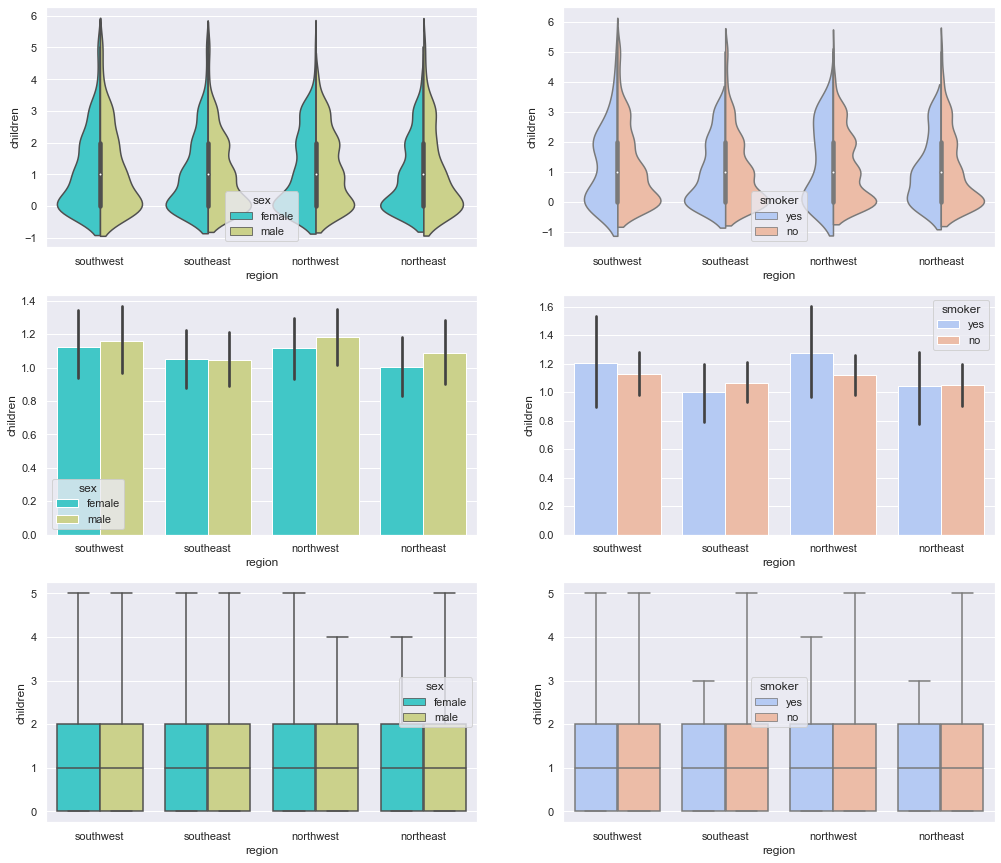

In [37]:
plot_distribution_with_nested_grouping('children')

**Observations**

Here I have made an attempt to plot the distribution of children for each region with gender / smoker categories using:
- Violin plot in first row
- Bar plot in second row
- Box plot in third row

#### Solution B: Plot distribution using seaborn.catplot()

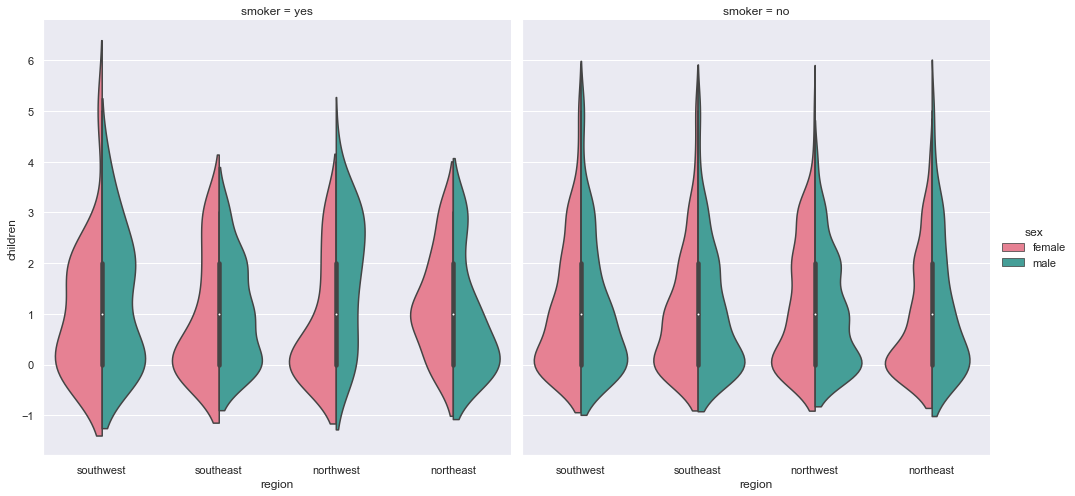

In [38]:
sns.catplot(
    x="region", 
    y="children", 
    hue="sex", 
    col="smoker", 
    data=insurance_df, 
    kind="violin",
    split=True,
    palette="husl",
    height=7,
    aspect=1
);

**Observations**

This plot shows the distribution of children against each region with:
- Gender (Sex) as hue
- Smoker as column

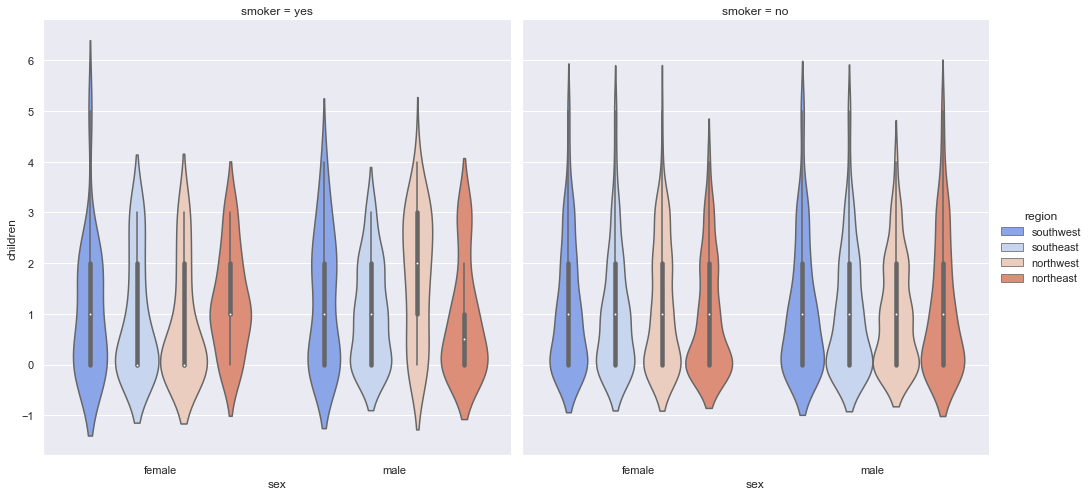

In [39]:
sns.catplot(
    x="sex", 
    y="children", 
    hue="region", 
    col="smoker",
    data=insurance_df, 
    kind="violin", 
    palette="coolwarm",
    height=7,
    aspect=1
)

**Observations**

This plot shows the distribution of children against gender (sex) with:
- Region as hue
- Smoker as column

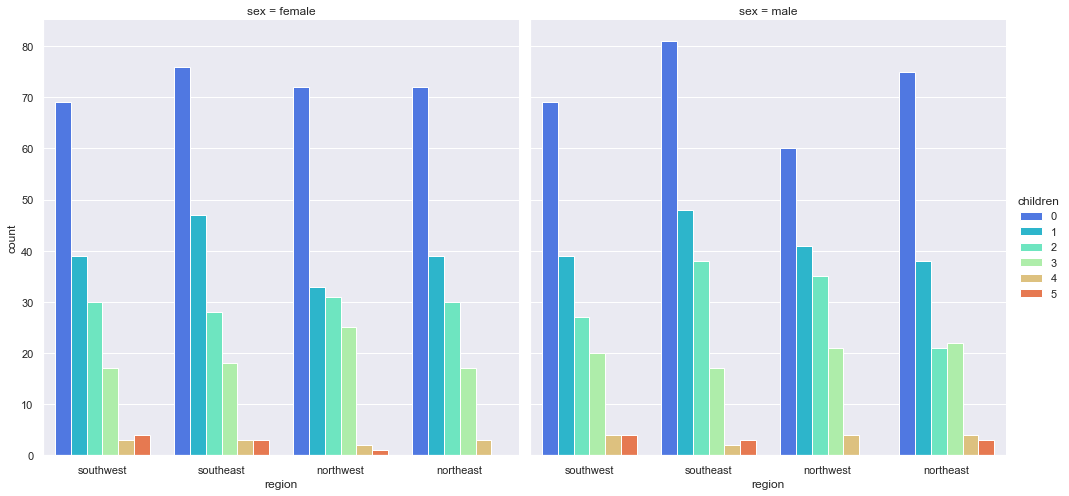

In [40]:
sns.catplot(
    x="region", 
    hue="children", 
    col="sex", 
    data=insurance_df, 
    kind="count",
    palette="rainbow",
    height=7,
    aspect=1
);

**Observations**

This plot shows the count of people for each region with:
- Children as hue
- Gender (Sex) as column

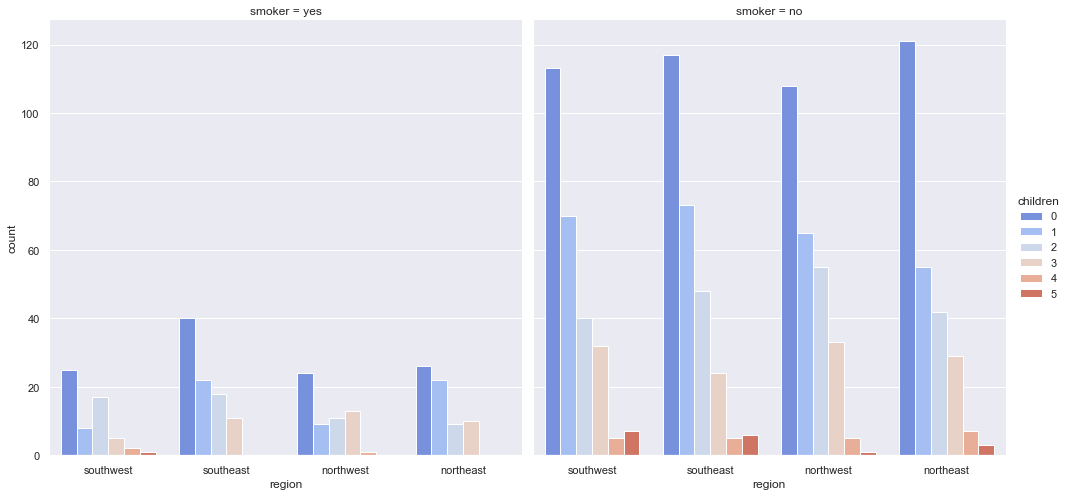

In [41]:
sns.catplot(
    x="region", 
    hue="children", 
    col="smoker", 
    data=insurance_df, 
    kind="count",
    palette="coolwarm",
    height=7,
    aspect=1
);

**Observations**

This plot shows the count of people for each region with:
- Children as hue
- Smoker as column

#### Final Observations
- _**It is observed that the count of smokers with children is significantly less than the count of non-smokers with children.**_
- _**Number of people with zero children in all the regions is maximum and number of people with 5 children all the regions is minumum**_

### 3. (i) Pair plot that includes all the columns of the data frame (4 marks)

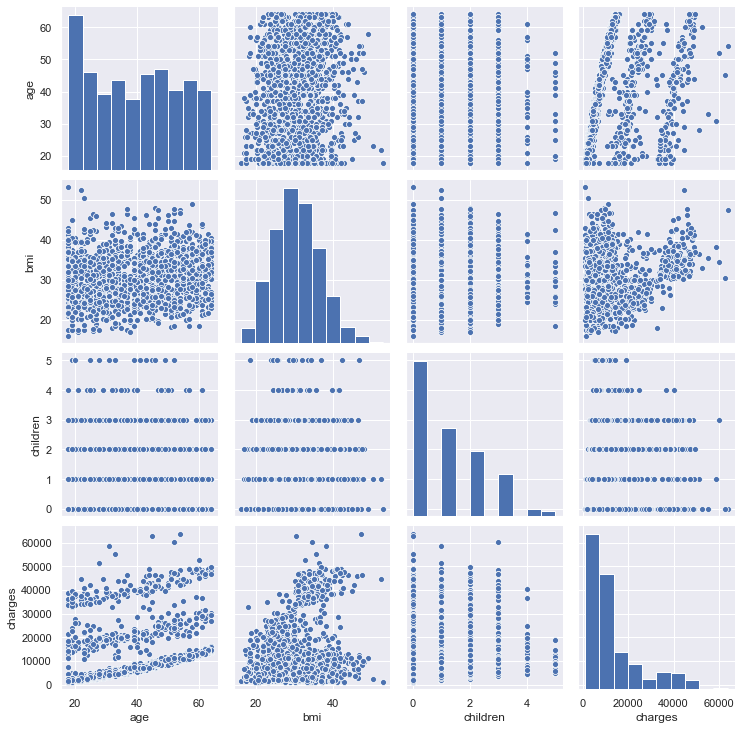

In [42]:
sns.pairplot(insurance_df)

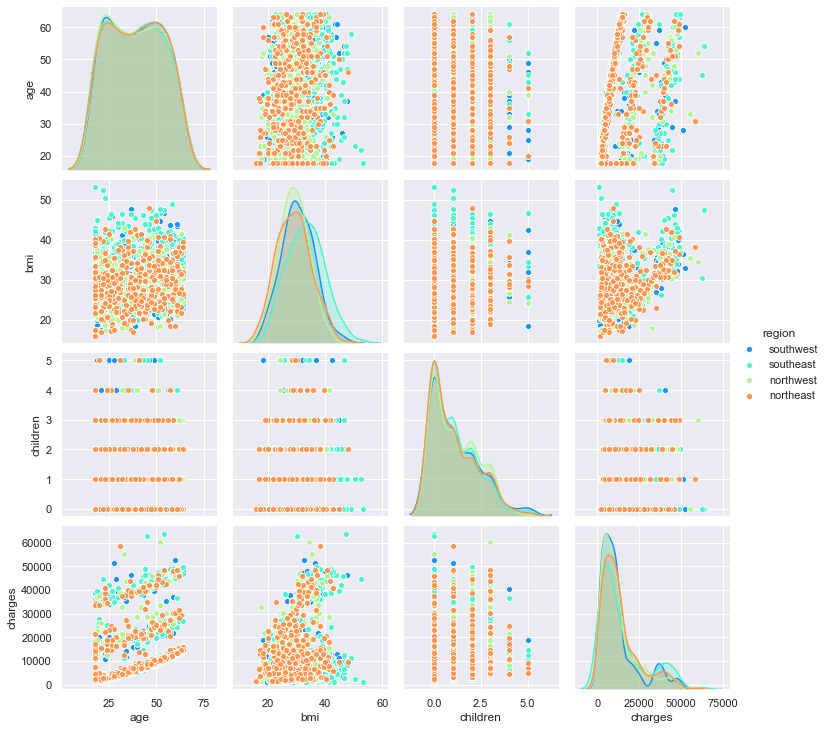

In [43]:
sns.pairplot(insurance_df, hue='region', palette='rainbow')

**Observations**

- _**Age and Charges**: There is a positive relationship between age and charges. Higher the age, higher the charges_
- _**Children and Charges**: People with less children are spending more charges than people with more children_
- _**BMI and Charges**: People with BMI between 30 and 40 have higher charges_
- _**BMI and Age**: People with less age have high BMI_
- _**BMI and Children**: People with no child or one child have high BMI_

### 4. Statistical Analysis & Hypothesis Testing (28 marks)

#### Definition of common functions needed for problems 4.(a) and 4.(b)

In [44]:
# Function to plot distribution of 2 samples of data
def plot_sample_distribution(sample1, sample2, title_sample1, title_sample2):
    figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    sns.distplot(sample1, ax=axes[0], bins=20)
    sns.distplot(sample2, ax=axes[1], bins=20)

    axes[0].set_title(title_sample1)
    axes[1].set_title(title_sample2)

In [45]:
# Function to perform a test - test function reference is passed as the last parameter.
# It displays the result of test performed.
def perform_hypothesis_test(sample1, sample2, alpha, test_fn):
    test_statistic, p_value = test_fn(sample1, sample2)
    
    print(f'  Test Statistic: {test_statistic}')
    print(f'  P-value: {p_value}\n')
    
    if p_value <= alpha:
        print(f'  Here the p-value ({round(p_value, 6)}) is less than or equal to alpha ({alpha}).')
        print('  The difference is significant. Hence we reject the Null hypothesis (Ho).\n')
    else:
        print(f'  Here the p-value ({round(p_value, 6)}) is greater than alpha ({alpha}).')
        print('  The difference is not significant. Hence we fail to reject the Null hypothesis (Ho).\n')

In [46]:
# Function to perform ztest and ttest on a given pair of sample data
def perform_tests(test_name, sample1, sample2, alpha):
    print(f'{test_name}: Z-Test Results')
    print('-----------------------')
    perform_hypothesis_test(sample1, sample2, alpha, ztest)
    
    print(f'{test_name}: T-Test Results')
    print('-----------------------')
    perform_hypothesis_test(sample1, sample2, alpha, ttest_ind)

### 4. (a) Do charges of people who smoke differ significantly from the people who don't? (7 marks)

**Ho (Null Hypothesis)**: Charges of people who smoke is equal to charges who do not smoke

**Ha (Alternate Hypothesis)**: Charges of people who smoke is not equal to charges who do not smoke

We select alpha = 0.05 (5% of significance level)

Since we want to compare the difference in means of the samples, we can either use:
- 2 sample T-Test (or)
- 2 sample Z-Test

We shall perform both tests and compare the results.

In [47]:
charges_smokers = insurance_df.loc[insurance_df.smoker == 'yes', 'charges']
charges_smokers

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [48]:
charges_non_smokers = insurance_df.loc[insurance_df.smoker == 'no', 'charges']
charges_non_smokers

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [49]:
charges_smokers.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [50]:
charges_non_smokers.describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

**Observations**

_<u>Charges for Smokers</u>_
- Count: 274
- Mean: 32050.23

_<u>Charges for Non-smokers</u>_
- Count: 1064
- Mean: 8434.268

_**It is observed that the statistical means of charges for smokers and non-smokers differ from each other. The distribution plot below also reveals the same fact.**_

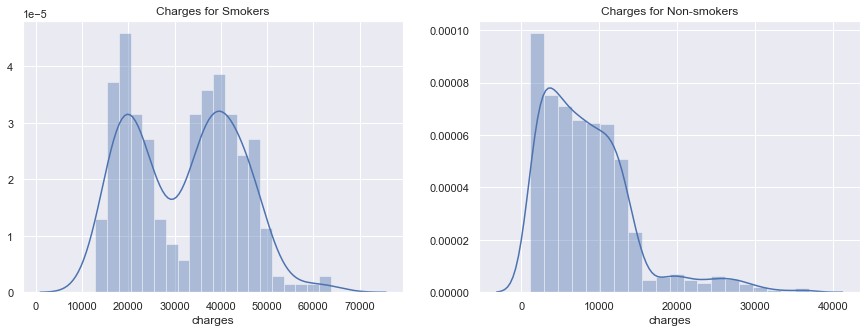

In [51]:
plot_sample_distribution(charges_smokers, charges_non_smokers, 'Charges for Smokers', 'Charges for Non-smokers')

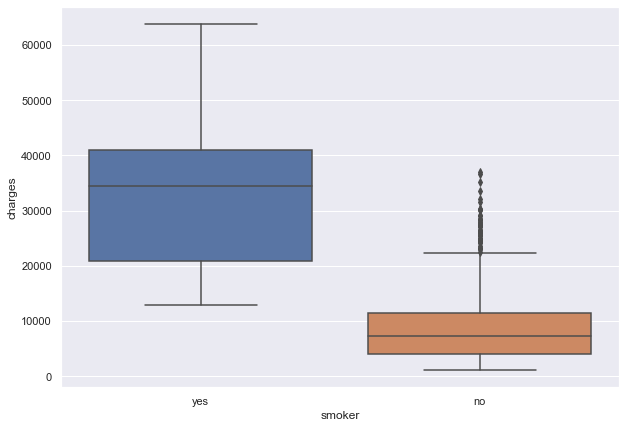

In [52]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='smoker', y='charges', data=insurance_df)

**Observations**

- Charges of persons who smoke are significantly higher than persons who dont smoke

In [53]:
alpha = 0.05
perform_tests('Charges', charges_smokers, charges_non_smokers, alpha)

Charges: Z-Test Results
-----------------------
  Test Statistic: 46.664921172723716
  P-value: 0.0

  Here the p-value (0.0) is less than or equal to alpha (0.05).
  The difference is significant. Hence we reject the Null hypothesis (Ho).

Charges: T-Test Results
-----------------------
  Test Statistic: 46.664921172723716
  P-value: 8.271435842177219e-283

  Here the p-value (0.0) is less than or equal to alpha (0.05).
  The difference is significant. Hence we reject the Null hypothesis (Ho).



### <u>Observations & Conclusion for 4. (a)</u>

The Z-Test and T-Test results shown above have a P-Value of 0. It is lesser than our chosen level of significance (5%). There is sufficient evidence to reject the Null hypothesis.

_**Therefore, the statistical decision is: <u>Reject the Null hypothesis (Ho)</u>.**_

### 4. (b) Does bmi of males differ significantly from that of females? (7 marks)

**Ho (Null Hypothesis)**: BMI of males and females are equal

**Ha (Alternate Hypothesis)**: BMI of males and females are nor equal

We select alpha = 0.05 (5% of significance level)

Since we want to compare the difference in means of the samples, we can either use:
- 2 sample T-Test (or)
- 2 sample Z-Test

We shall perform both tests and compare the results.

In [54]:
bmi_males = insurance_df.loc[insurance_df.sex == 'male', 'bmi']
bmi_males

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64

In [55]:
bmi_females = insurance_df.loc[insurance_df.sex == 'female', 'bmi']
bmi_females

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64

In [56]:
bmi_males.describe()

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

In [57]:
bmi_females.describe()

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

**Observations**

_<u>BMI for Males</u>_
- Count: 676
- Mean: 30.94

_<u>BMI for Females</u>_
- Count: 662
- Mean: 30.37

_**It is observed that the statistical means of BMI for males and females are approximately the same. The distribution plots and box plots below also reveal the same fact.**_

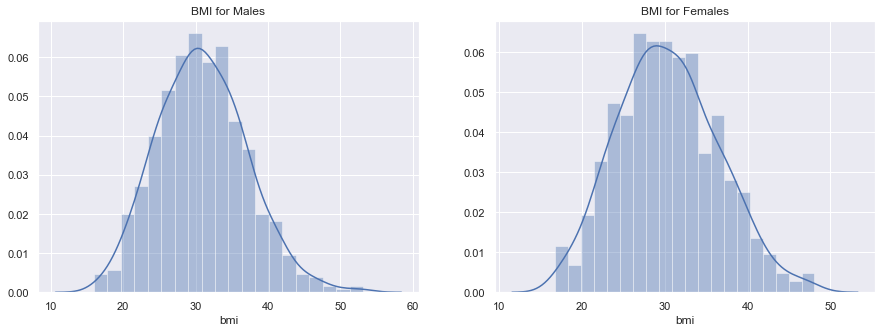

In [58]:
plot_sample_distribution(bmi_males, bmi_females, 'BMI for Males', 'BMI for Females')

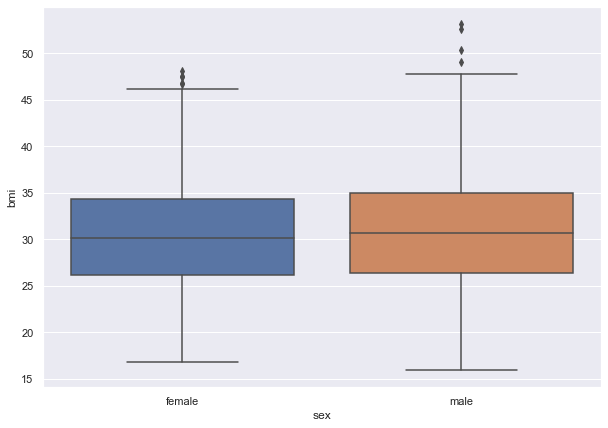

In [59]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='sex', y='bmi', data=insurance_df)

In [60]:
alpha = 0.05
perform_tests('BMI', bmi_males, bmi_females, alpha)

BMI: Z-Test Results
-----------------------
  Test Statistic: 1.6967526357522242
  P-value: 0.08974343679943912

  Here the p-value (0.089743) is greater than alpha (0.05).
  The difference is not significant. Hence we fail to reject the Null hypothesis (Ho).

BMI: T-Test Results
-----------------------
  Test Statistic: 1.696752635752224
  P-value: 0.08997637178984932

  Here the p-value (0.089976) is greater than alpha (0.05).
  The difference is not significant. Hence we fail to reject the Null hypothesis (Ho).



### <u>Observations & Conclusion for 4. (b)</u>

The Z-Test and T-Test results shown above have a P-Value of 0.089. It is greater than our chosen level of significance (5%). There is sufficient evidence to 'failed-to-reject' the Null hypothesis.

_**Therefore, the statistical decision is: <u>Failed to reject the Null hypothesis (Ho)</u>.**_

### 4. (c) Is the proportion of smokers significantly different in different genders? (7 marks)

**Ho (Null Hypothesis)**: The proportions of smokers are equal in different genders

**Ha (Alternate Hypothesis)**: The two proportions are not equal

We select alpha = 0.05 (5% of significance level)

The test statistic for proportions can be obtained using:
- Z-Test for proportions
- Chi-Square test

We shall perform both tests for this problem

In [61]:
# Function to perform a proportion test - test function reference is passed as the last parameter.
# It displays the result of test performed.
def perform_single_proportion_test(count, nobs, alpha, test_fn):
    result = test_fn(count, nobs)
    test_statistic = result[0] 
    p_value = result[1]
    
    print(f'  Test Statistic: {test_statistic}')
    print(f'  P-value: {p_value}\n')
    
    if p_value <= alpha:
        print(f'  Here the p-value ({round(p_value, 6)}) is less than or equal to alpha ({alpha}).')
        print('  The difference is significant. Hence we reject the Null hypothesis (Ho).\n')
    else:
        print(f'  Here the p-value ({round(p_value, 6)}) is greater than alpha ({alpha}).')
        print('  The difference is not significant. Hence we fail to reject the Null hypothesis (Ho).\n')

In [62]:
# Function to perform ztest and chisquare proportion tests
def perform_proportion_tests(test_name, count, nobs, alpha):
    print(f'{test_name}: Z-Test Proportion Test Results')
    print('--------------------------------------------')
    perform_single_proportion_test(count, nobs, alpha, proportions_ztest)
    
    print(f'{test_name}: Chi-Square Proportion Test Results')
    print('------------------------------------------------')
    perform_single_proportion_test(count, nobs, alpha, proportions_chisquare)

In [63]:
sex_col.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [64]:
male_count, female_count = sex_col.value_counts()

print('Male count:', male_count)
print('Female count:', female_count)

Male count: 676
Female count: 662


In [65]:
insurance_df.loc[insurance_df.sex ==  'male', 'smoker'].value_counts()

no     517
yes    159
Name: smoker, dtype: int64

In [66]:
male_smoker_count = insurance_df.loc[insurance_df.sex ==  'male', 'smoker'].value_counts()[1]
male_smoker_count

159

In [67]:
insurance_df.loc[insurance_df.sex ==  'female', 'smoker'].value_counts()

no     547
yes    115
Name: smoker, dtype: int64

In [68]:
female_smoker_count = insurance_df.loc[insurance_df.sex ==  'female', 'smoker'].value_counts()[1]
female_smoker_count

115

In [69]:
male_smoker_ratio = male_smoker_count / male_count * 100
male_smoker_ratio

23.5207100591716

In [70]:
female_smoker_ratio = female_smoker_count / female_count * 100
female_smoker_ratio

17.371601208459214

**Observations**

_<u>Total Count</u>_
- Males: 676
- Females: 662

_<u>Smoker Count</u>_
- Males: 159
- Females: 115

**The smoker ratio of males (23.52%) and females (17.37%) is different**

In [71]:
alpha = 0.05
perform_proportion_tests(
    'Smoker',
    [male_smoker_count, female_smoker_count], 
    [male_count, female_count],
    alpha
)

Smoker: Z-Test Proportion Test Results
--------------------------------------------
  Test Statistic: 2.7867402154855503
  P-value: 0.005324114164320532

  Here the p-value (0.005324) is less than or equal to alpha (0.05).
  The difference is significant. Hence we reject the Null hypothesis (Ho).

Smoker: Chi-Square Proportion Test Results
------------------------------------------------
  Test Statistic: 7.765921028604452
  P-value: 0.005324114164320537

  Here the p-value (0.005324) is less than or equal to alpha (0.05).
  The difference is significant. Hence we reject the Null hypothesis (Ho).



### <u>Observations & Conclusion for 4. (c)</u>

The Z-Test and Chi-Square proportion test results shown above have a P-Value of 0.005324. It is lesser than our chosen level of significance (5%). There is sufficient evidence to reject the Null hypothesis.

_**Therefore, the statistical decision is: <u>Reject the Null hypothesis (Ho)</u>.**_

### 4. (d) Is the distribution of bmi across women with no children, one child and two children, the same? (7 marks)

We have three groups:
- Women with no children
- Women with one child
- Women with two children

**Ho (Null Hypothesis)**: Mean of BMI of all the three groups are equal.

**Ha (Alternate Hypothesis)**: Mean of BMI of at least one group differs.

We select alpha = 0.05 (5% of significance level)

Here we have three groups. Analysis of Variance (ANOVA) can determine whether the means of three or more groups are different. ANOVA uses F-Tests to statistically test the equality of means.

In [72]:
bmi_women_no_child = insurance_df[(insurance_df.sex == 'female') & (insurance_df.children == 0)].bmi
bmi_women_no_child

0       27.90
5       25.74
9       25.84
11      26.29
13      39.82
        ...  
1331    33.40
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 289, dtype: float64

In [73]:
bmi_women_01_child = insurance_df[(insurance_df.sex == 'female') & (insurance_df.children == 1)].bmi
bmi_women_01_child

6       33.440
16      30.780
21      32.400
23      31.920
58      22.880
         ...  
1262    28.050
1263    29.900
1287    25.900
1299    25.745
1302    20.800
Name: bmi, Length: 158, dtype: float64

In [74]:
bmi_women_02_child = insurance_df[(insurance_df.sex == 'female') & (insurance_df.children == 2)].bmi
bmi_women_02_child

27      32.775
41      36.630
43      30.800
46      38.665
51      33.630
         ...  
1313    34.700
1319    26.315
1323    40.370
1328    24.225
1330    25.740
Name: bmi, Length: 119, dtype: float64

In [75]:
bmi_women_no_child.describe()

count    289.000000
mean      30.361522
std        5.966934
min       17.290000
25%       26.200000
50%       29.925000
75%       34.600000
max       47.410000
Name: bmi, dtype: float64

In [76]:
bmi_women_01_child.describe()

count    158.000000
mean      30.052658
std        5.786831
min       16.815000
25%       25.982500
50%       29.567500
75%       33.942500
max       46.090000
Name: bmi, dtype: float64

In [77]:
bmi_women_02_child.describe()

count    119.00000
mean      30.64979
std        6.62820
min       17.19500
25%       25.77000
50%       31.30000
75%       34.75000
max       48.07000
Name: bmi, dtype: float64

**Observations**

_<u>BMI of Women with no children</u>_
- Count: 289
- Mean: 30.36

_<u>BMI of Women with one child</u>_
- Count: 158
- Mean: 30.05

_<u>BMI of Women with two children</u>_
- Count: 119
- Mean: 30.64

**Mean of BMI of all the three groups are approximately equal**

In [78]:
bmi_women_df = pd.DataFrame()

bmi_women_df = bmi_women_df.append(pd.DataFrame({ 'Children': 'None', 'BMI': bmi_women_no_child}))
bmi_women_df = bmi_women_df.append(pd.DataFrame({ 'Children': 'One', 'BMI': bmi_women_01_child}))
bmi_women_df = bmi_women_df.append(pd.DataFrame({ 'Children': 'Two', 'BMI': bmi_women_02_child}))

bmi_women_df

,Children,BMI
0,None,27.900
5,None,25.740
9,None,25.840
11,None,26.290
13,None,39.820
...,...,...
1313,Two,34.700
1319,Two,26.315
1323,Two,40.370
1328,Two,24.225


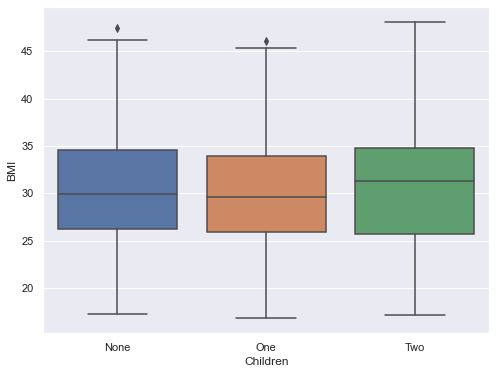

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Children', y='BMI', data=bmi_women_df)

**Observations**

- Graphically the distribution of 3 groups looks similar

In [80]:
alpha = 0.05
statistic, p_value = f_oneway(
    bmi_women_no_child,
    bmi_women_01_child,
    bmi_women_02_child
)

print('One Way ANOVA Test Results')
print('--------------------------')
print(f'  Statistic: {statistic}')
print(f'  P-value: {p_value}\n')

if p_value <= alpha:
    print(f'  Here the p-value ({round(p_value, 6)}) is less than or equal to alpha ({alpha}).')
    print('  The difference is significant. Hence we reject the Null hypothesis (Ho).\n')
else:
    print(f'  Here the p-value ({round(p_value, 6)}) is greater than alpha ({alpha}).')
    print('  The difference is not significant. Hence we fail to reject the Null hypothesis (Ho).\n')

One Way ANOVA Test Results
--------------------------
  Statistic: 0.3344720147757968
  P-value: 0.7158579926754841

  Here the p-value (0.715858) is greater than alpha (0.05).
  The difference is not significant. Hence we fail to reject the Null hypothesis (Ho).



**Observations**

The One-way ANOVA test result shown above has a P-Value of 0.7158. It is significantly greater than our chosen level of significance (5%). There is sufficient evidence to 'failed-to-reject' the Null hypothesis.

In [81]:
mod = ols('BMI ~ Children', data=bmi_women_df).fit()
aov_table = anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Children,24.590123,2.0,0.334472,0.715858
Residual,20695.661583,563.0,NaN,NaN


**Observations**

The ANOVA test result shown above has a P-Value of 0.7158. It is significantly greater than our chosen level of significance (5%). There is sufficient evidence to 'failed-to-reject' the Null hypothesis.

In [82]:
tukey_result = pairwise_tukeyhsd(bmi_women_df['BMI'], bmi_women_df['Children'], alpha)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  None    One  -0.3089 0.8494 -1.7186 1.1008  False
  None    Two   0.2883 0.8942 -1.2636 1.8402  False
   One    Two   0.5971 0.6797 -1.1323 2.3265  False
---------------------------------------------------


### <u>Observations & Conclusion for 4. (d)</u>

<u>**Tukey Result**</u>
- _**None (no children) vs One (one child)**: 'reject' column has 'false' value, it signifies that the Means of these two groups are statistically equal_
- _**None (no children) vs Two (two children)**: 'reject' column has 'false' value, it signifies that the Means of these two groups are statistically equal_
- _**One (one child) vs Two (two children)**: 'reject' column has 'false' value, it signifies that the Means of these two groups are statistically equal_

<u>**Conclusion**</u>

The ANOVA test results shown above have a P-Value of 0.7158. It is significantly greater than our chosen level of significance (5%). There is sufficient evidence to 'failed-to-reject' the Null hypothesis.

_**Therefore, the statistical decision is: <u>Failed to reject the Null hypothesis (Ho)</u>.**_